# 05/06/2024

# Logistic Regression

# Classification Problem
    Target or Dependent Variable is known and it is categorical
    Example - Spam and ham mail detection
            - Medical Test - Covid +ve or -ve
                         - Cancel Yes or No
                         - Diabetes Yes or No
            - Loan Prediction : Yes or No
            - Credit Card : Yes or No
            - Insurance Claim : Yes or No
            - Transaction : Fraud or Genuine
            - Feedbacks/Ratings : 0,1,2,3,4
            - Grades : O,A,B,C

    Algorithms used for Classification
        - Logistic Regression
        - Decision Tree
        - Random Forest 
        - Naive Byes
        - Adaboost
        - XGboost
        - KNN
        etc

* Probability Formula = No.of success / no of total Outcomes     0....0.5....1

* Odds Ratio 
    = P/1-P
    aLso Called as Probability of Success / Probablity failure   0......infinity

* log of odds Ratio                                           -infy.......infinity

y = mx+c   range is from -inf to inf  
            & odd ratio 0 to infinity 
we used log function to convert odds ratio from (0 to infy) to (-infy to infy)


*We are taking log of odds ration so this algo is called logit, logistic.


* Sigmoid Function
* f(y)=1/1+exp^-y

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-100,100,1000)
def sigmoid(x):
    return 1/(1+np.exp(-x))
    

In [2]:
# print(x)

In [3]:
y=sigmoid(x)

In [4]:
# print(y)

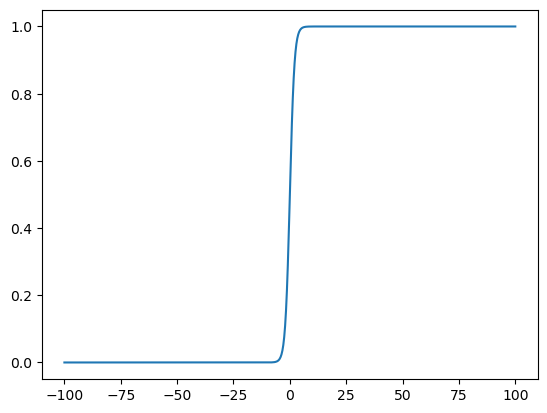

In [5]:
plt.figure()
plt.plot(x,y)
plt.show()

In [6]:
# importing the datasets
# We will work on titanic 



In [7]:
# import the libraries 
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.shape

(891, 12)

In [12]:
test_data.shape

(418, 11)

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# we will do preprocessing and EDA simultaneously on only one data
# So we will concat train and test data
# after preprocessing we will divide the data again

In [16]:
train_data['DataSource']='Train'
test_data['DataSource']='Test'

In [17]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DataSource
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


# Concatenate Train and Test Data

In [18]:
all_data=pd.concat([train_data,test_data],axis=0)

In [19]:
all_data.shape

(1309, 13)

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  DataSource   1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [21]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
DataSource        0
dtype: int64

In [22]:
# As 1014 of 1309 records are missing from Cabin we should drop that column
1014/1309

0.774637127578304

In [23]:
all_data.drop('Cabin',axis=1,inplace=True)

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  DataSource   1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


<Axes: ylabel='Age'>

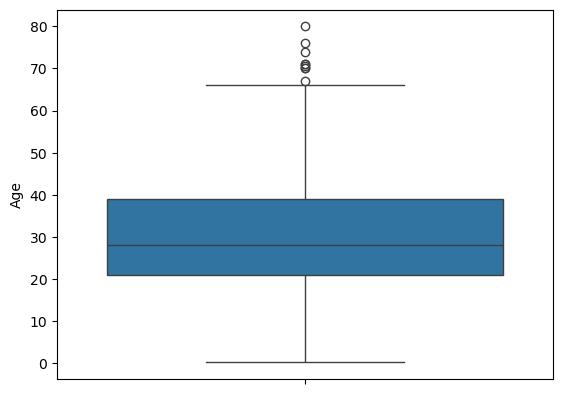

In [25]:
sns.boxplot(all_data['Age'])

In [26]:
# As there are some outliers it is good to fill null values by median
all_data['Age'].mean()

29.881137667304014

In [27]:
all_data['Age'].median()

28.0

In [28]:
all_data['Age']=all_data['Age'].fillna(all_data['Age'].median())

In [29]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
DataSource       0
dtype: int64

In [30]:
# droping the unnesecessary columns / feature Engineering
all_data.drop(['Name','PassengerId','Ticket','Fare'],axis=1,inplace=True)

In [31]:
all_data.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Embarked        2
DataSource      0
dtype: int64

In [32]:
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [33]:
# Filling the null values of Embark by s
all_data['Embarked']=all_data['Embarked'].fillna('S')

In [34]:
all_data.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Embarked        0
DataSource      0
dtype: int64

In [35]:
# EDA
all_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'DataSource'],
      dtype='object')

In [36]:
all_data['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

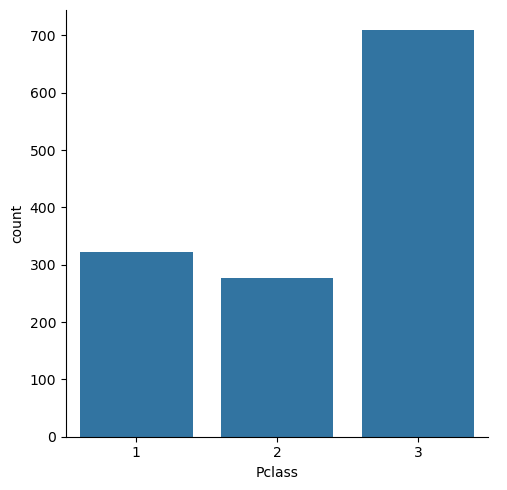

In [37]:
sns.catplot(data=all_data,x='Pclass',kind='count')
# Insight : We can observe that most of the people are from P Class 3

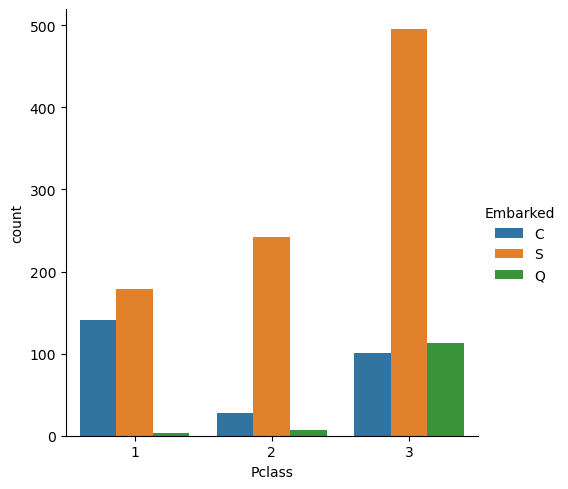

In [38]:
sns.catplot(data=all_data,x='Pclass',kind='count',hue='Embarked')

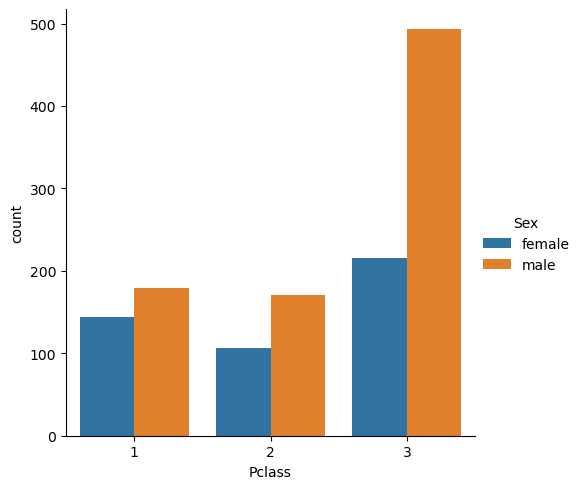

In [39]:
sns.catplot(data=all_data,x='Pclass',kind='count',hue='Sex')

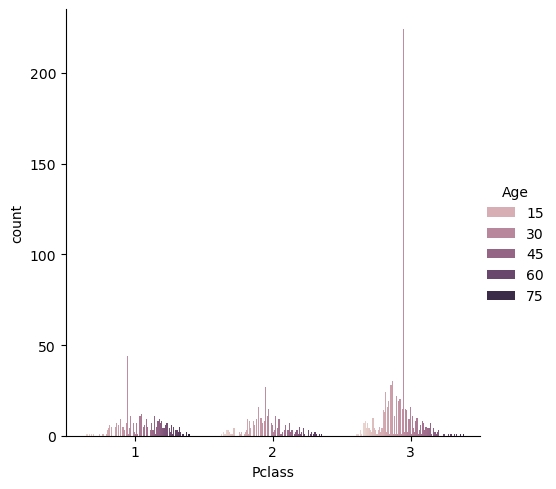

In [40]:
sns.catplot(data=all_data,x='Pclass',kind='count',hue='Age')

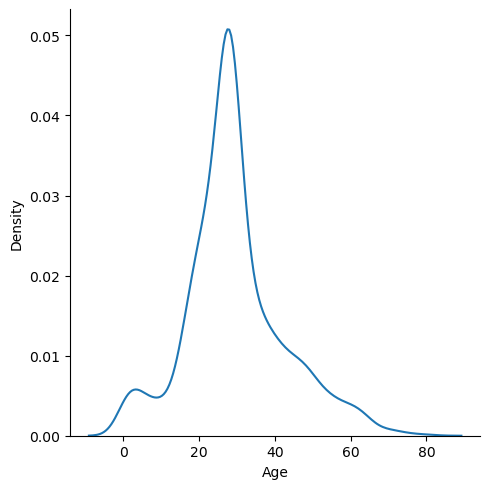

In [41]:
sns.displot(data=all_data,x='Age',kind='kde')

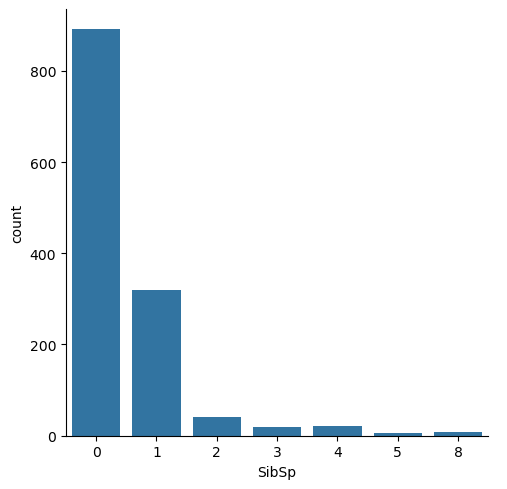

In [42]:
sns.catplot(data=all_data,x='SibSp',kind='count')

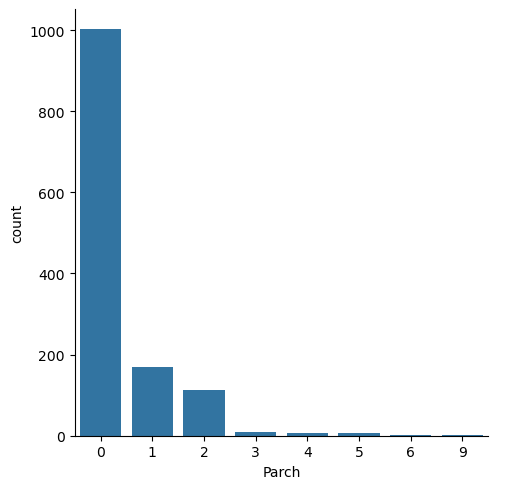

In [43]:
sns.catplot(data=all_data,x='Parch',kind='count')

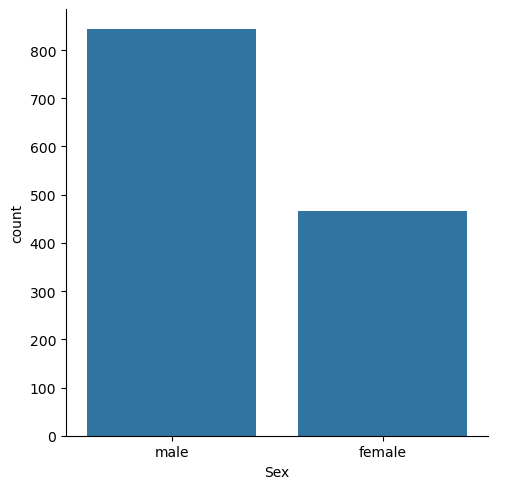

In [44]:
sns.catplot(data=all_data,x='Sex',kind='count')

In [45]:
# Pandas Profiling

In [46]:
# Here No outlier Treatment is needed as there is only one numerical column age
# It doesnt make any sense to remove outlier from age column

# Encoding

In [47]:
for i in all_data.columns:
    print(i,all_data[i].unique())

Survived [ 0.  1. nan]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6 9]
Embarked ['S' 'C' 'Q']
DataSource ['Train' 'Test']


# One Hot Encoding for sex, Embarked Columns

In [48]:
all_data=pd.get_dummies(data=all_data,columns=['Sex'],dtype='int')

In [49]:
all_data=pd.get_dummies(data=all_data,columns=['Embarked'],dtype='int')

In [50]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,DataSource,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,Train,0,1,0,0,1
1,1.0,1,38.0,1,0,Train,1,0,1,0,0
2,1.0,3,26.0,0,0,Train,1,0,0,0,1
3,1.0,1,35.0,1,0,Train,1,0,0,0,1
4,0.0,3,35.0,0,0,Train,0,1,0,0,1


In [51]:
all_data.drop('Sex_female',axis=1,inplace=True)

In [52]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,DataSource,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,Train,1,0,0,1
1,1.0,1,38.0,1,0,Train,0,1,0,0
2,1.0,3,26.0,0,0,Train,0,0,0,1
3,1.0,1,35.0,1,0,Train,0,0,0,1
4,0.0,3,35.0,0,0,Train,1,0,0,1


In [53]:
all_data.drop('Embarked_S',axis=1,inplace=True)

In [54]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,DataSource,Sex_male,Embarked_C,Embarked_Q
0,0.0,3,22.0,1,0,Train,1,0,0
1,1.0,1,38.0,1,0,Train,0,1,0
2,1.0,3,26.0,0,0,Train,0,0,0
3,1.0,1,35.0,1,0,Train,0,0,0
4,0.0,3,35.0,0,0,Train,1,0,0


In [55]:
train_data=all_data[all_data['DataSource']=='Train']

In [56]:
train_data.drop('DataSource',axis=1,inplace=True)

In [57]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_C',
       'Embarked_Q'],
      dtype='object')

In [58]:
test_data=all_data[all_data['DataSource']=='Test']

In [59]:
test_data.drop('Survived',axis=1,inplace=True)

In [60]:
test_data.drop('DataSource',axis=1,inplace=True)

In [61]:
test_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_C',
       'Embarked_Q'],
      dtype='object')

In [62]:
test_data.head

<bound method NDFrame.head of      Pclass   Age  SibSp  Parch  Sex_male  Embarked_C  Embarked_Q
0         3  34.5      0      0         1           0           1
1         3  47.0      1      0         0           0           0
2         2  62.0      0      0         1           0           1
3         3  27.0      0      0         1           0           0
4         3  22.0      1      1         0           0           0
..      ...   ...    ...    ...       ...         ...         ...
413       3  28.0      0      0         1           0           0
414       1  39.0      0      0         0           1           0
415       3  38.5      0      0         1           0           0
416       3  28.0      0      0         1           0           0
417       3  28.0      1      1         1           1           0

[418 rows x 7 columns]>

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [65]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,1,0,0
1,1,38.0,1,0,0,1,0
2,3,26.0,0,0,0,0,0
3,1,35.0,1,0,0,0,0
4,3,35.0,0,0,1,0,0


In [66]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [69]:
#model buliding 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred=lr.predict(x_test)

In [71]:
#training score
lr.score(x_train,y_train)

0.7935393258426966

In [72]:
#testing score
lr.score(x_test,y_test)

0.8100558659217877

In [73]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0.])

In [74]:
from sklearn.metrics import accuracy_score
## training sccuracy
accuracy_score(y_train,lr.predict(x_train))

0.7935393258426966

In [75]:
accuracy_score(y_test,lr.predict(x_test))

0.8100558659217877

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [77]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[91, 19],
       [15, 54]], dtype=int64)

In [78]:
## TPR,FPR,TNR,Precison,Recall,Specificity,F1score

In [79]:
from sklearn.metrics import precision_score,recall_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('precesion:',prec)
print('recall:' , recall)

precesion: 0.7397260273972602
recall: 0.782608695652174


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       110
         1.0       0.74      0.78      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [81]:
# AUC= area under the curved  = it is the graph of TPR vs FPR (80-90%)
# ROC = receiver Operating charateristics 


In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
log_roc_auc_score=roc_auc_score(y_test,y_pred)
print('Area under curve:',log_roc_auc_score)

Area under curve: 0.8049407114624505


In [84]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print(fpr,tpr,threshold)

[0.         0.17272727 1.        ] [0.        0.7826087 1.       ] [2. 1. 0.]


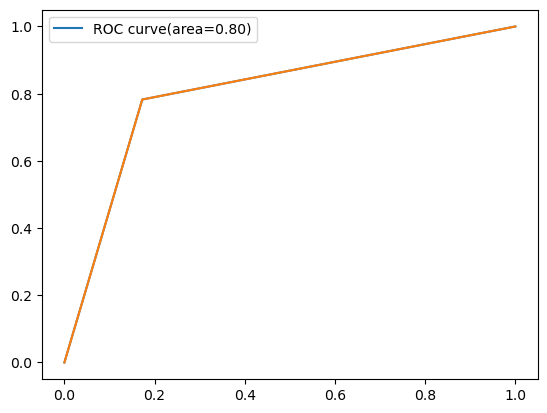

In [85]:
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%log_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()

In [86]:
# to predict the result for our test_data in which no survived column where there 


In [87]:
y_pred_test_data=lr.predict(test_data)

In [88]:
test_data['Survived']=y_pred_test_data

In [89]:
test_data

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Survived
0,3,34.5,0,0,1,0,1,0.0
1,3,47.0,1,0,0,0,0,0.0
2,2,62.0,0,0,1,0,1,0.0
3,3,27.0,0,0,1,0,0,0.0
4,3,22.0,1,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,1,0,0,0.0
414,1,39.0,0,0,0,1,0,1.0
415,3,38.5,0,0,1,0,0,0.0
416,3,28.0,0,0,1,0,0,0.0


In [90]:
#Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred_tree=dtree.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test,y_pred_tree)
print('testing accuracy',accuracy_test)

testing accuracy 0.7932960893854749


In [102]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1)
svm.fit(x_train,y_train)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.7865168539325843
Testing accuracy: 0.7877094972067039


In [99]:
#from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.6376404494382022
Testing accuracy: 0.6424581005586593


In [100]:
#from sklearn.svm import SVC
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.6362359550561798
Testing accuracy: 0.6424581005586593


In [101]:
#from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
print("Training accuracy:",accuracy_score(y_train,svm.predict(x_train)))
print("Testing accuracy:",accuracy_score(y_test,svm.predict(x_test)))

Training accuracy: 0.5660112359550562
Testing accuracy: 0.6089385474860335
